In [17]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

import seaborn.apionly as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('ggplot')

from ipywidgets import IntSlider, interact

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Correlation

In this 2nd part, we will study the correlation between the mRNA and proteins relative concentrations.<br/>
We expect most of them to be correlated since the mRNA is the precursor of the protein.<br/>
Our goal is to extract uncorrelated entries for further studies.

### Loading Data

In [18]:
# Unstandardized data
prot_data_without_norm = pd.read_csv('data/data_prot.csv', index_col=0, header=[0, 1])
mRNA_data_without_norm = pd.read_csv('data/data_mRNA.csv', index_col=0, header=[0, 1])
data_without_norm = pd.read_csv('data/data.csv', index_col=0, header=[0, 1])

# Standardized data (Log2 and z-score)
prot_data = pd.read_csv('data/data_prot_log2_zscore.csv', index_col=0, header=[0, 1])
mRNA_data = pd.read_csv('data/data_mRNA_log2_zscore.csv', index_col=0, header=[0, 1])
data = pd.read_csv('data/data_log2_zscore.csv', index_col=0, header=[0, 1])

# Log2 data
prot_data_log2 = pd.read_csv('data/data_prot_log2.csv', index_col=0, header=[0, 1])
mRNA_data_log2 = pd.read_csv('data/data_mRNA_log2.csv', index_col=0, header=[0, 1])
data_log2 = pd.read_csv('data/data_log2.csv', index_col=0, header=[0, 1])

# Diff Log2 data
prot_data_geom = pd.read_csv('data/data_prot_diff_log2.csv', index_col=0, header=[0, 1])
mRNA_data_geom = pd.read_csv('data/data_mRNA_diff_log2.csv', index_col=0, header=[0, 1])
data_geom = pd.read_csv('data/data_diff_log2.csv', index_col=0, header=[0, 1])

## 0 - First visualization

Before computing any correlation coefficients, we first visualize the evolution of levels of proteins and mRNA over time.

### a) Scatter

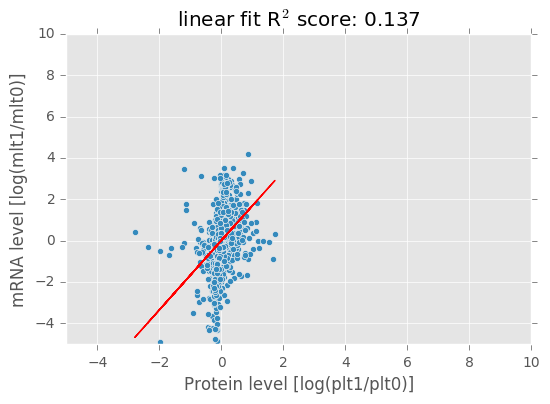

In [19]:
# 

x_min = -5
x_max = 10
y_min = -5
y_max = 10

def plot_relation_scatter(i):
    t = [k for k in range(11) if k != 9]
    
    # setup linear regression model
    lr = LinearRegression()

    # Fit the data
    x = data_geom.prot['d'+str(t[i])][:, np.newaxis]
    y = data_geom.mRNA['d'+str(t[i])][:, np.newaxis]
    lr.fit(x, y)
    score = lr.score(x,y)

    # draw scatter plot
    data_geom.plot(kind='scatter', x=("prot", 'd'+str(t[i])), y=("mRNA", 'd'+str(t[i])))
    #data_set.plot(kind='scatter', x='t'+str(t)+'p', y='t'+str(t)+'m')
    
    # plot fit
    plt.plot(x, lr.predict(x), 'r-')
    
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    plt.xlabel('Protein level [log(plt'+str(t[i])+'/plt'+str(t[i-1])+')]')
    plt.ylabel('mRNA level [log(mlt'+str(t[i])+'/mlt'+str(t[i-1])+')]')
    plt.title('linear fit R$^2$ score: '+str(np.round(score,3)))
    plt.show()

interact(plot_relation_scatter, i=IntSlider(min=1, max=9))
plt.show()

We can observe that the pattern scatters along a diagonal line, which reinforces our belief that the two data sets should be correlated.


### b) Heatmap

Another way to visualize correlations is to use heatmaps. Let's define our plot function :

In [22]:
def plot_heatmap(df, symmask=False, subplot=None):
    if symmask:
        mask_ = np.triu(np.ones(df.shape, dtype=bool),k=1) 
        ax = sns.heatmap(df, annot=True, fmt=".1f", linewidths=0.5, cbar=False, square=True, mask=mask_, ax=subplot)
        ax.set_axis_bgcolor('None')
        #ax.set_facecolor('None')
    else:
        ax = sns.heatmap(df, annot=True, fmt=".1f", linewidths=0.5, cbar=False, square=True, ax=subplot)
    return ax

Let's compute the heatmap of correlation between all possible pair of stages :

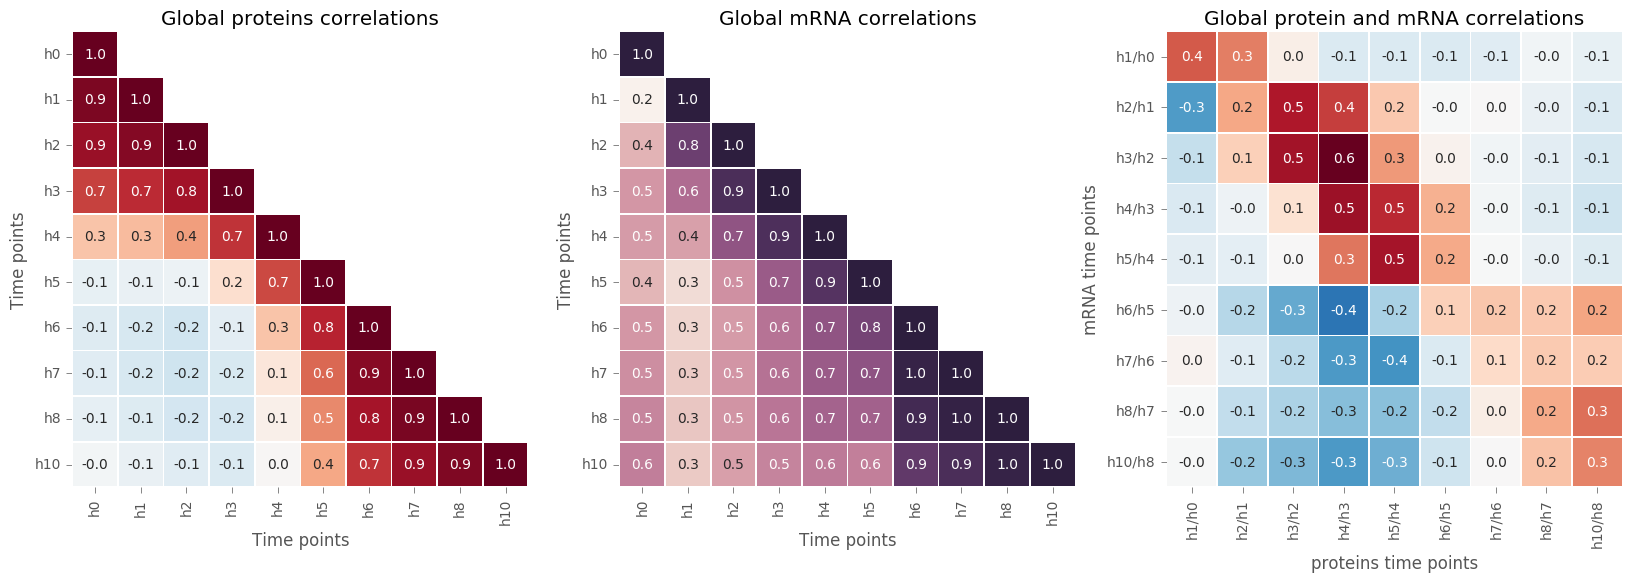

In [23]:
f, axarr = plt.subplots(1, 3, figsize=(20,15))

# Proteins
axarr[0] = plot_heatmap(prot_data_log2.corr(), symmask=True, subplot=axarr[0])
axarr[0].set_title('Global proteins correlations')
axarr[0].set_xlabel('Time points')
axarr[0].set_ylabel('Time points')
axarr[0].set_xticklabels(['h'+str(k) for k in range(11) if k != 9])
axarr[0].set_yticklabels(['h'+str(k) for k in reversed(range(11)) if k != 9])

# mRNA
axarr[1] = plot_heatmap(mRNA_data_log2.corr(), symmask=True, subplot=axarr[1])
axarr[1].set_title('Global mRNA correlations')
axarr[1].set_xlabel('Time points')
axarr[1].set_ylabel('Time points')
axarr[1].set_xticklabels(['h'+str(k) for k in range(11) if k != 9])
axarr[1].set_yticklabels(['h'+str(k) for k in reversed(range(11)) if k != 9])

# mRNA & proteins
t = [k for k in range(11) if k != 9]
axarr[2] = plot_heatmap(data_geom.corr().iloc[9:19, 0:9], subplot=axarr[2])
axarr[2].set_title('Global protein and mRNA correlations')
axarr[2].set_xlabel('proteins time points')
axarr[2].set_ylabel('mRNA time points')
axarr[2].set_xticklabels(['h'+str(t[k])+'/h'+str(t[k-1]) for k in range(1,10)])
axarr[2].set_yticklabels(['h'+str(t[k])+'/h'+str(t[k-1]) for k in reversed(range(1,10))])
#axarr[2].set_xticklabels(['h'+str(k) for k in range(11) if k != 9])
#axarr[2].set_yticklabels(['h'+str(k) for k in reversed(range(11)) if k != 9])

plt.show()

- *Global proteins correlations :* <br/>
h0 and h1 seem to be highly correlated, whereas h6, h7, h8 seem to be anti-correlated with h1, h2.
- *Global mRNA correlations :*<br/>
The heatmap looks like the proteins one. Thus, we make similar observations.
- *Global protein and mRNA correlations :*<br/>
Until we reach t=5h, the mRNA level at time t seems to be correlated with protein level at time t+1. That can be interpretated as the delay in protein synthesis.<br/>
Notice that as in our previous plots, correlation is explicit only before t(mRNA) = 5h and t(protein)=6h. It corresponds to the time of meiotic nuclear division.

## I - Pearson's correlation Analysis

We can compute the correlation using the Pearson's coefficient :
$$ \text{corr}(X,Y) = \dfrac{\text{cov}(X,Y)}{\sigma_X \sigma_Y} $$

In [59]:
def compute_corr(k):
    """Compute correlation between prot k and mRNA k for log2 data"""
    return prot_data_log2.iloc[k]["prot"].corr(mRNA_data_log2.iloc[k]["mRNA"], method='pearson')

We compute the coefficient for each mRNA/protein pair :

In [60]:
correl = np.zeros((data_geom.shape[0],))
for k in range(data_geom.shape[0]):
    correl[k] = compute_corr(k)

corr_ = pd.Series(correl, index=data.index)

Let's plot the result :

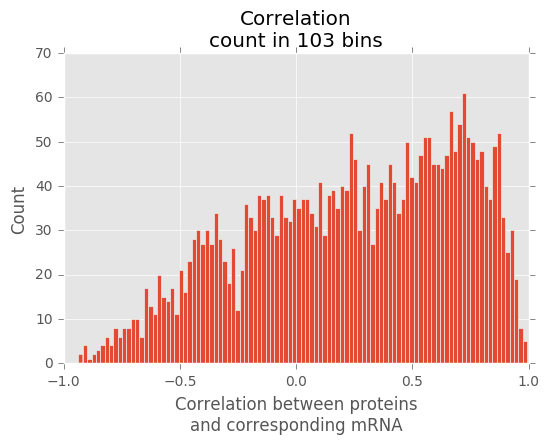

In [61]:
ndata_per_bin = 30 # if uniform
nbins = int(data_geom.shape[0]/ndata_per_bin)

plt.hist(corr_, bins=nbins)
plt.title('Correlation\ncount in '+str(nbins)+' bins')
plt.xlabel('Correlation between proteins\nand corresponding mRNA')
plt.ylabel('Count')

plt.show()

In [62]:
print("Averaged correlation : ", corr_.mean())
print("Averaged correlation in absolute value : ", np.abs(corr_).mean())

Averaged correlation :  0.237944144301
Averaged correlation in absolute value :  0.4391076056


Remember that the Pearson correlation values are between **-1** and **1**.
- A correlation of **0** means that the concentrations are **uncorrelated**
- A correlation of **-1** means that the concentrations are **anticorrelated**
- A correlation of **1** means that the concentrations are **correlated**. 

On the graph, we can observe that :
- Few concentrations are anti-correlated.
- A significant number of entries are correlated.
- A lot of entries are not so clearly correlated, and even uncorrelated.

On the whole, the concentrations tends to be correlated, even if the correlation strength can vary.

## II - Concentrations evolution for various correlation degrees

Let's have a quick look at some representative of each type of correlation.<br/>
First of all, we define a plot function which enable to represent the evolution of mRNA and protein concentration for one given mRNA/protein pair.

In [63]:
def plot_set(k): # k = protein
    
    xticks_ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10]
    
    if type(k) == int:
        plt.plot(xticks_, prot_data.iloc[k].values, label='Protein')
        plt.plot(xticks_, mRNA_data.iloc[k].values, label='mRNA')
        plt.title(prot_data.index[k])
    elif type(k) == str:
        plt.plot(xticks_, prot_data.loc[k].values, label='Protein')
        plt.plot(xticks_, mRNA_data.loc[k].values, label='mRNA')
        plt.title(k)
    else:
        raise NameError('unrecognize input type '+str(type(k)))
    
    plt.xlabel('Time [h]')
    plt.ylabel('Standardized log$_2$ ratio')
    
    plt.xticks(xticks_)
    
    plt.legend()
    plt.show()

In [64]:
prot_data.loc['SPBC21C3.18'].values

array([-0.90815577, -1.20550754, -1.14090606, -0.62858522,  1.08883191,
        1.56342466,  1.02815045,  0.47777496,  0.05246624, -0.32749364])

### a) Most correlated data

We begin with the most correlated data (coefficient close to 1).

In [65]:
most_correlated = corr_.sort_values().tail(1)
most_correlated

SPBC28E12.02    0.993118
dtype: float64

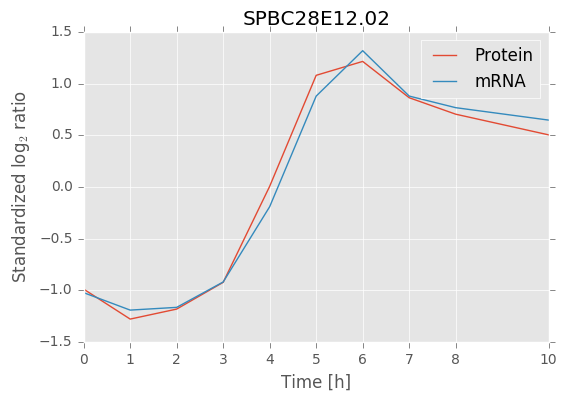

In [66]:
plot_set(most_correlated.index[0])

In this case, the protein level exactly fits the mRNA's one. <br/>
It then seems logical that this mRNA produces this protein.

### b) Most anticorrelated data

In [67]:
most_anticorrelated = corr_.sort_values().head()
most_anticorrelated

SPBP8B7.23     -0.936281
SPAC1610.02c   -0.920767
SPBC28F2.12    -0.916135
SPBC3B8.05     -0.913583
SPAC2F7.04     -0.912690
dtype: float64

There are 2 possible cases of anti-correlation :
- The first one : The protein's level increases whereas the mRNA level decreases.
- The second one : The mRNA level increases whereas the protein level decreases.

- **1st case** : The protein's level increases whereas the mRNA level decreases.

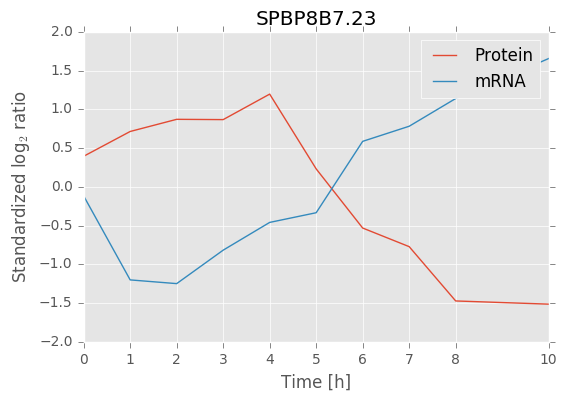

In [68]:
plot_set(most_anticorrelated.index[0])

One possible explanation is that, in some cases, the mRNA is destroyed when we have enough proteins (post-transcriptionnal regulation). However, the previously produced proteins are still living, and the remaining mRNA keep producing new proteins. 

- **2nd case** : The mRNA level increases whereas the protein level decreases.

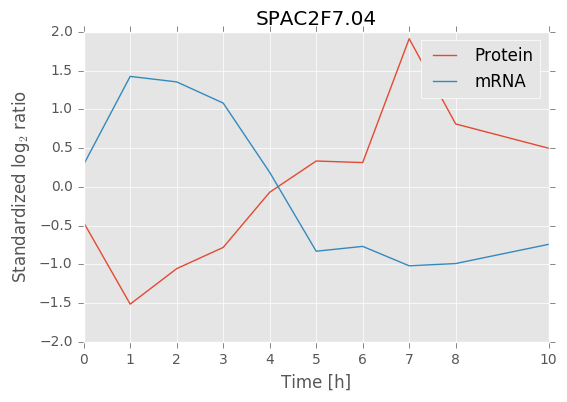

In [69]:
plot_set(most_anticorrelated.index[4])

Again, one possible explanation could be regulatory processes : proteins or ribosomes may have been degragated and thus, the proteins level decreases.

### c) Most uncorrelated data

In [70]:
sym_thr = 0.0004
most_uncorrelated = corr_[np.abs(corr_) <sym_thr]
most_uncorrelated

SPAC27D7.11c    0.000046
SPCC1672.08c   -0.000396
dtype: float64

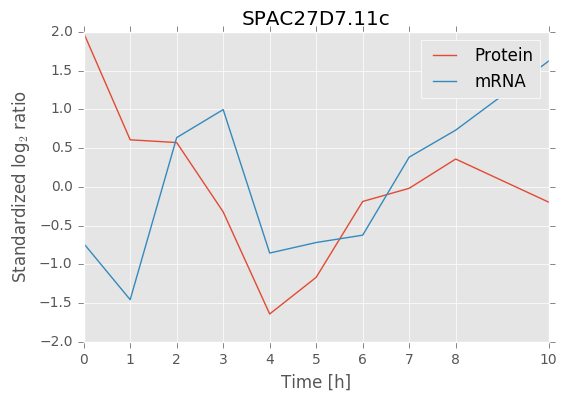

In [71]:
plot_set(most_uncorrelated.index[0]);

### d) For common data

The averaged correlation in absolute value is 0.436.<br/>
Let's have a quick look at the correlated data with a coefficient of 0.4.

In [72]:
common_correlated = corr_[corr_<0.39].sort_values().tail(2)
common_correlated

SPCC736.15     0.388588
SPBC1709.18    0.389491
dtype: float64

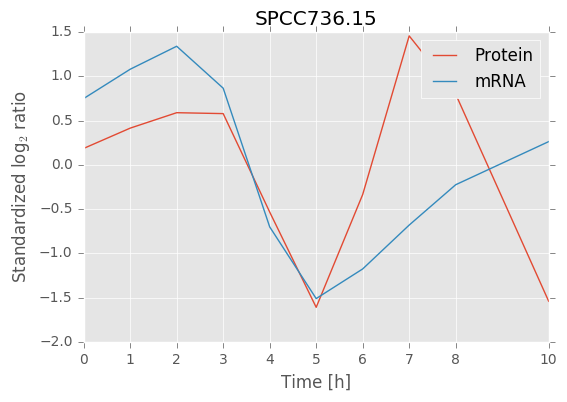

In [73]:
plot_set(common_correlated.index[0])

For this example of correlation coefficient of 0.4, the protein level doesn't fit the mRNA level perfectly, but the levels increase and decrease at the "same" time.

## III - Correlation analysis for time shifted mRNA-proteins

Using a time shift, we want to match the mRNA data with the prot data with a shift of 1h to account for the reaction time.

In [74]:
# New time scale
new_t = np.array(['d'+str(x) for x in range(1,8)])

# Log2 data
prot_data_geom_shifted = prot_data_geom.prot.drop(['d1', 'd10'], axis=1).copy()
prot_data_geom_shifted.columns = new_t
mRNA_data_geom_shifted = mRNA_data_geom.mRNA.drop(['d8', 'd10'], axis=1).copy()
mRNA_data_geom_shifted.columns = new_t

In [75]:
correl = np.zeros((data_geom.shape[0],))
for k in range(data_geom.shape[0]):
    correl[k] = prot_data_geom_shifted.iloc[k].corr(mRNA_data_geom_shifted.iloc[k], method='pearson')

corr_shifted = pd.Series(correl, index=data.index).sort_values()

In [76]:
corr_shifted.tail(3)

SPAC637.06     0.978460
SPBC29A3.12    0.983537
SPBC3H7.15     0.986642
dtype: float64

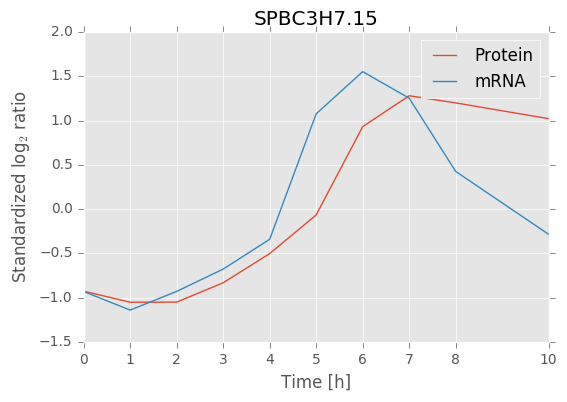

In [77]:
plot_set(corr_shifted.tail(1).index[0])

We can generalize this method for any time shift dt

In [78]:
def gen_time_shift(dt):
    
    times = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 10])
    
    t_inter = np.intersect1d(times, times + dt)
    t_mRNA = t_inter - dt
    t_prot = t_inter
    
    prot_data_geom_shifted = prot_data_geom.prot.loc[:, ['d'+str(t) for t in t_prot]].copy()
    prot_data_geom_shifted.columns = ['d'+str(t) for t in t_mRNA]
    mRNA_data_geom_shifted = mRNA_data_geom.mRNA.loc[:, ['d'+str(t) for t in t_mRNA]].copy()
    
    return prot_data_geom_shifted, mRNA_data_geom_shifted

def compute_corr_shifted(dt):
    prot_shifted_dt, mRNA_shifted_dt = gen_time_shift(dt)

    correl = np.zeros((data_geom.shape[0],))
    for k in range(data_geom.shape[0]):
        correl[k] = prot_shifted_dt.iloc[k].corr(mRNA_shifted_dt.iloc[k], method='pearson')
    
    return pd.Series(correl, index=data_geom.index).sort_values()

SPAC637.06     0.978460
SPBC29A3.12    0.983537
SPBC3H7.15     0.986642
dtype: float64


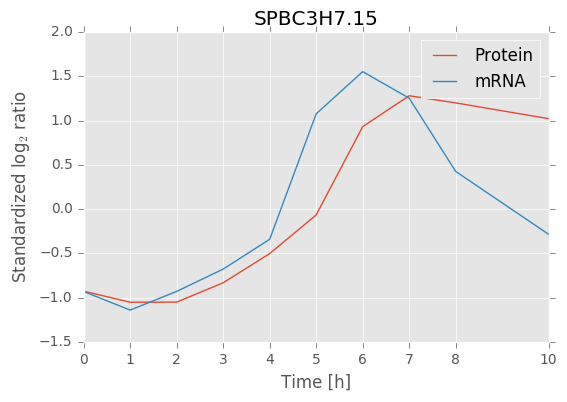

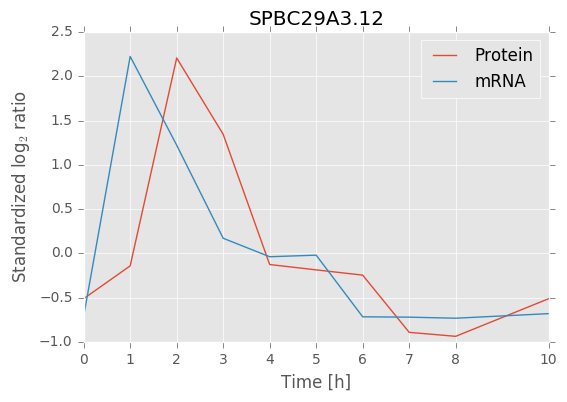

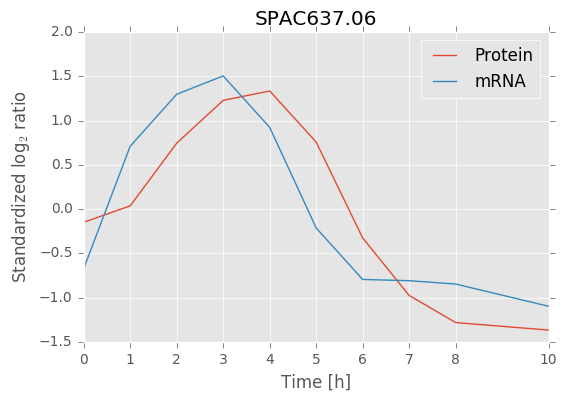

In [79]:
# choose time shift dt [h]
dt = 1

# compute corr for shifted mRNA-prot
corr_shifted_dt = compute_corr_shifted(dt)
print(corr_shifted_dt.tail(3))
for k in range(0,3):
    plot_set(corr_shifted_dt.tail(k+1).index[0])

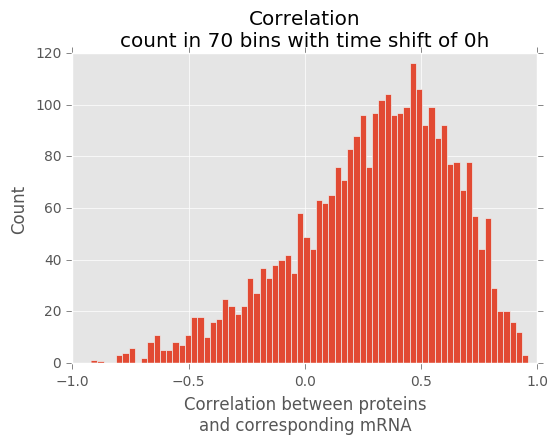

mean correlation: 0.294510858884


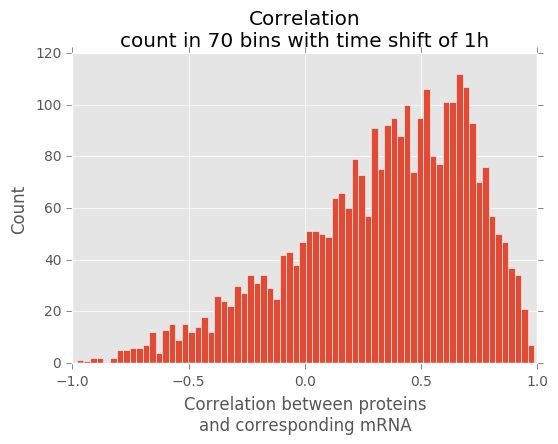

mean correlation: 0.329144424527


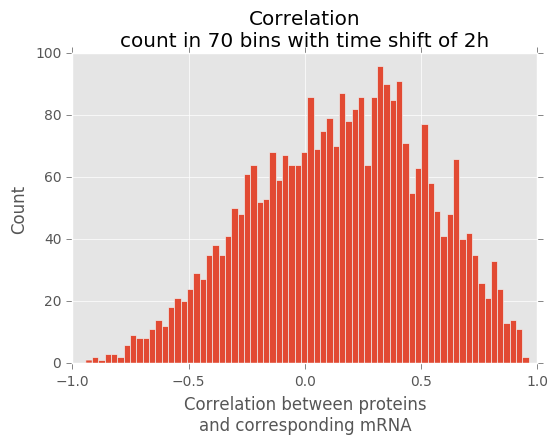

mean correlation: 0.151615165839


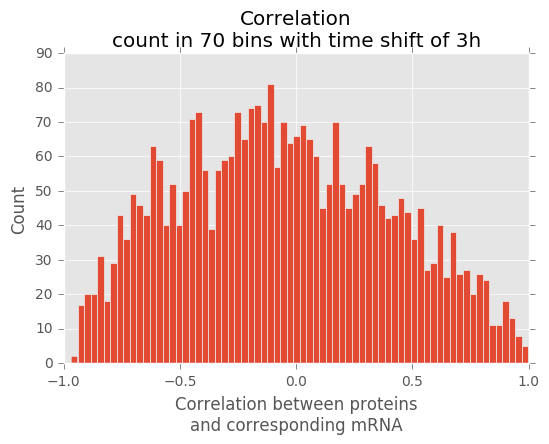

mean correlation: -0.0535083403908


In [80]:
# choose range of time shift
dt_times = [0, 1, 2, 3]

# set plot option
nbins = 70

for dt in dt_times:
    corr_shifted_dt = compute_corr_shifted(dt)
    plt.hist(corr_shifted_dt, bins=nbins)
    plt.title('Correlation\ncount in '+str(nbins)+' bins with time shift of '+str(dt)+'h')
    plt.xlabel('Correlation between proteins\nand corresponding mRNA')
    plt.ylabel('Count')

    plt.show()
    
    print("mean correlation:", np.mean(corr_shifted_dt))

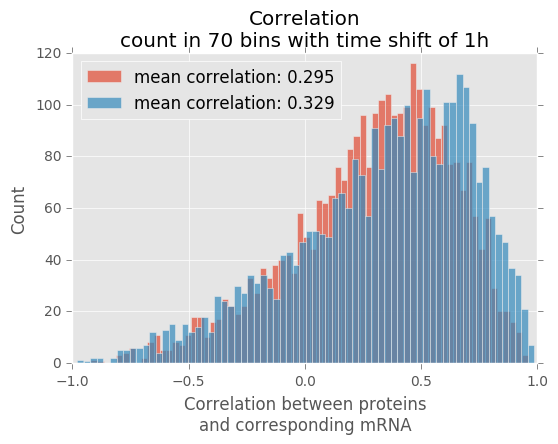

In [83]:
# choose range of time shift
dt_times = [0, 1]

# set plot option
nbins = 70

for dt in dt_times:
    corr_shifted_dt = compute_corr_shifted(dt)
    plt.hist(corr_shifted_dt, bins=nbins, alpha=0.7, label='mean correlation: '+str(np.round(np.mean(corr_shifted_dt), 3)))
    plt.title('Correlation\ncount in '+str(nbins)+' bins with time shift of '+str(dt)+'h')
    plt.xlabel('Correlation between proteins\nand corresponding mRNA')
    plt.ylabel('Count')
    
plt.legend(loc='best')
plt.show()
    

## Conclusion

Finally, at the end of this part, we've identified various correlation patterns. But we are still unable to extract uncorrelated entries. Indeed, the choice of the threshold for "uncorrelated" entries is subjective.<br/>
As our goal is to cluster uncorrelated entries, we will explore 2 solutions :
- Try to cluster the whole dataset and extract a cluster of "uncorrelated" entries
- Try to cluster the "uncorrelated" data for different threshold values.